In [38]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Paths

In [132]:
project_dir = "/mnt/c/Users/ktmea/Projects/plague-phylogeography-projects/main/"
host_path = os.path.join(project_dir, "iqtree/all/chromosome/full/filter5/filter-taxa/host_proportion.txt")
out_dir = os.path.join(project_dir, "iqtree/all/chromosome/full/filter5/filter-taxa/")

In [55]:
host_df = pd.read_csv(host_path, sep='\t')
host_df.set_index("clade", inplace=True)

host_df

,samples,human,non-human,na
clade,,,,
1.ORI,117,25.64100,64.1026,10.25640
1.IN,39,15.38460,84.6154,0.00000
1.ANT,4,50.00000,0.0000,50.00000
1.PRE,40,100.00000,0.0000,0.00000
2.MED,116,14.65520,82.7586,2.58621
2.ANT,54,31.48150,66.6667,1.85185
4.ANT,11,9.09091,81.8182,9.09091
3.ANT,11,9.09091,90.9091,0.00000
0.ANT,115,10.43480,87.8261,1.73913


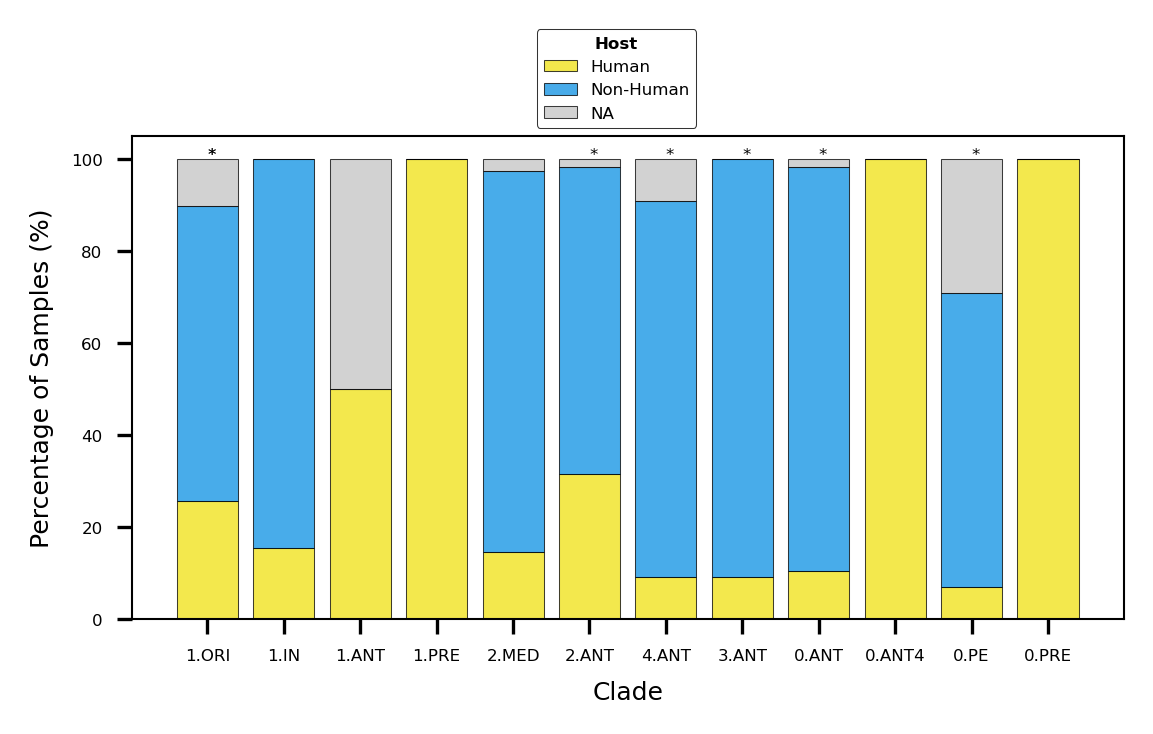

In [151]:
# ---------------------------------------
# PLOT SETUP
TARGET_RES = [1280, 640]
DPI=300
FIGSIZE=[TARGET_RES[0] / DPI, TARGET_RES[1] / DPI]
FONTSIZE=4
LOCUS_DEP = 10
RATIO = 0.7
plt.rc('font', size=FONTSIZE)

fig, axes = plt.subplots(1,1,figsize=FIGSIZE, dpi=DPI)

ax=axes    
ax.set_xlabel("Clade", fontsize=FONTSIZE * 1.5)
ax.set_ylabel("Percentage of Samples (%)", fontsize=FONTSIZE * 1.5)
ax.set_ylim(0,105)
for spine in ax.spines:
        ax.spines[spine].set_linewidth(0.5)    
        
# Convert the dataframe to an array
labels=["Human", "Non-Human", "NA"]
columns = [label.lower() for label in labels]

data = np.array([host_df[col] for col in columns])
bottom = np.vstack((np.zeros((data.shape[1],), dtype=data.dtype),
                    np.cumsum(data, axis=0)[:-1]))
colors=["#f0e111", "#0b90e3", "#c4c4c4"]
for dat, bot, color, label in zip(data, bottom, colors, labels):
    ax.bar(host_df.index, dat, color=color, bottom=bot, alpha=0.75, ec="black", lw=0.25, label=label)
    
legend = ax.legend(title="Host", edgecolor="black", bbox_to_anchor=(0.4, 1))
legend.get_title().set_fontweight("bold")
legend.get_frame().set_linewidth(0.25)

# Significance asterisks
sig_clades = ["0.PE", "0.ANT", "1.ORI", "2.ANT", "3.ANT", "4.ANT"]
x = 0
for clade in host_df.index:
    if clade in sig_clades:
        ax.text(s="*", x=x, y=100)   
    x += 1

ax.text(s="*", x=0, y=100)

out_path = os.path.join(out_dir, "host_proportion")
plt.savefig(out_path + ".png", dpi=DPI, bbox_inches = "tight", facecolor="white")
plt.savefig(out_path + ".svg", dpi=DPI, bbox_inches = "tight")